# Estimation of hydraulic propeties using moddeling tools

### Project GRANAR - MECHA

To mesure the root hydraulic conductivities, experimental procedures are rather challenging and time consuming. Here is a srcipt that assembles the Generator of Root Anatomy in R [GRANAR](https://granar.github.io/) and the Model of Explicit Cross-section Hydraulic Architecture [MECHA](https://mecharoot.github.io/).
Together it is possible to generate a root cross-section and estimates its hydraulic properties, such as: it's radial hydraulic conductivity (kr) and the axial hydraulic conductance (kx). A few maturation senario are implemented inside the model to mirror the different apoplastic barrier developpement along the root axis. 

## GRANAR:
Upon a small set of anatomical features the GRANAR model is able to reconstruct a generic root cell network for mono and dicotyledon.

Change kernel to R to launch the following script.


In [2]:
# Loading R library
library(tidyverse)
library(plyr)
library(deldir)
library(sp)
library(xml2)
library(viridis)

source("./GRANAR/R/granar.R")

Warning message:
"package 'deldir' was built under R version 4.0.3"
deldir 0.1-29


     Please note that the arguments "col" and 
     "lty" of plot.deldir() have had their 
     names changed to "cmpnt_col" and "cmpnt_lty" 
     respectively, basically to allow "col" and 
     and "lty" to be passed as "..." arguments. 
     Also the "plotit" argument of deldir() has 
     been changed to (simply) "plot". 
     See the help for plot.deldir() and deldir().


Warning message:
"package 'sp' was built under R version 4.0.3"
Warning message:
"package 'viridis' was built under R version 4.0.3"
Loading required package: viridisLite



In [3]:
# Load one parameter file for GRANAR
params <- read_param_xml("GRANAR/model_params/Zea_mays_2_Heymans_2019.xml")

 # # # # # # # # # # # # # # #
#  To change paramter value   #
 # # # # # # # # # # # # # # #
    
# Xylem size (diameter)
params$value[params$type == "max_size" & params$name == "xylem"] <- 0.026

# aerenchyma proportion
params$value[params$type == "proportion" & params$name == "aerenchyma"] <- 0.2
# number of lacuna
params$value[params$type == "n_files" & params$name == "aerenchyma"] <- 15

# Generate the anatomy
sim <- create_anatomy(parameters = params, verbatim=F, paraview = F)
# sim is a list
# sim$nodes is a data frame with most of the information
# sim$output is a data frame with summarize anatomical features


     PLEASE NOTE:  The components "delsgs" and "summary" of the
 object returned by deldir() are now DATA FRAMES rather than
 matrices (as they were prior to release 0.0-18).
 See help("deldir").
 
     PLEASE NOTE: The process that deldir() uses for determining
 duplicated points has changed from that used in version
 0.0-9 of this package (and previously). See help("deldir").



`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`su

[1] "NA in cell coordinate ... "
Time difference of 1.069748 mins


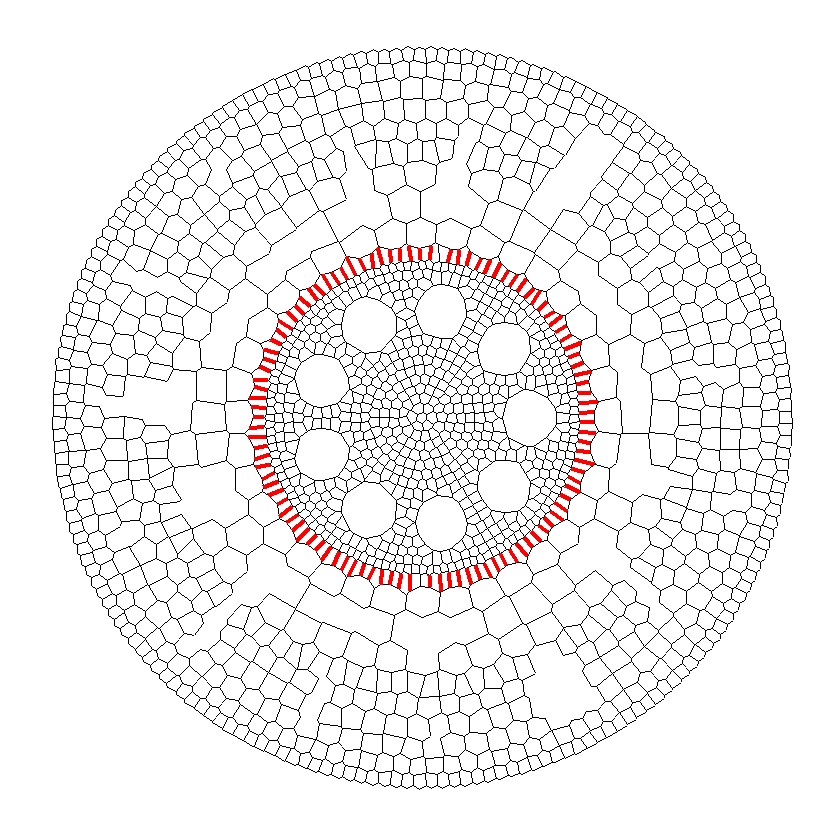

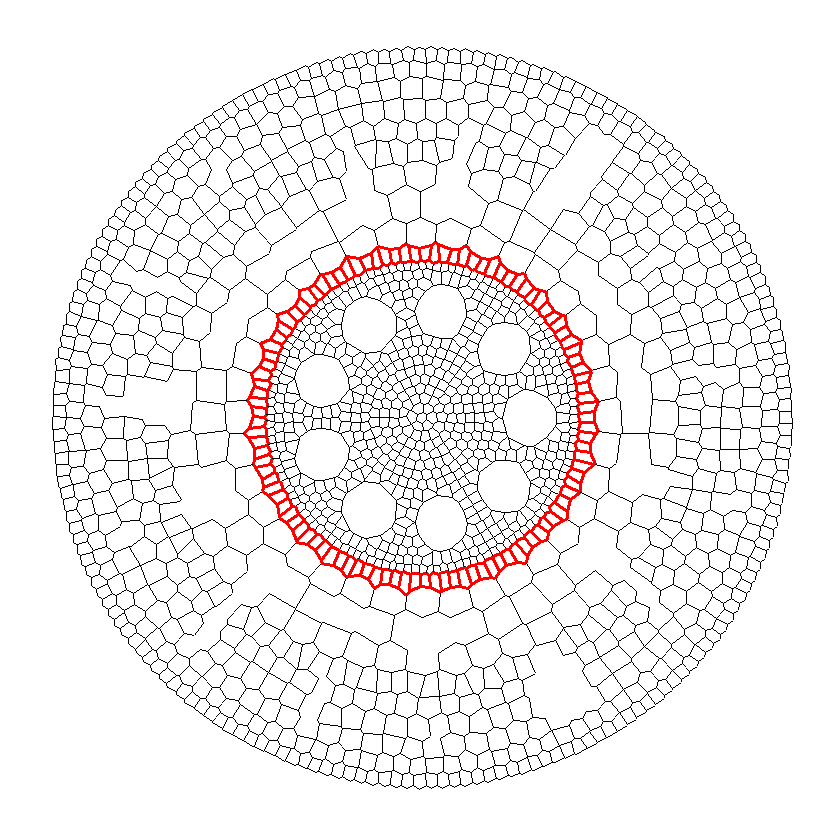

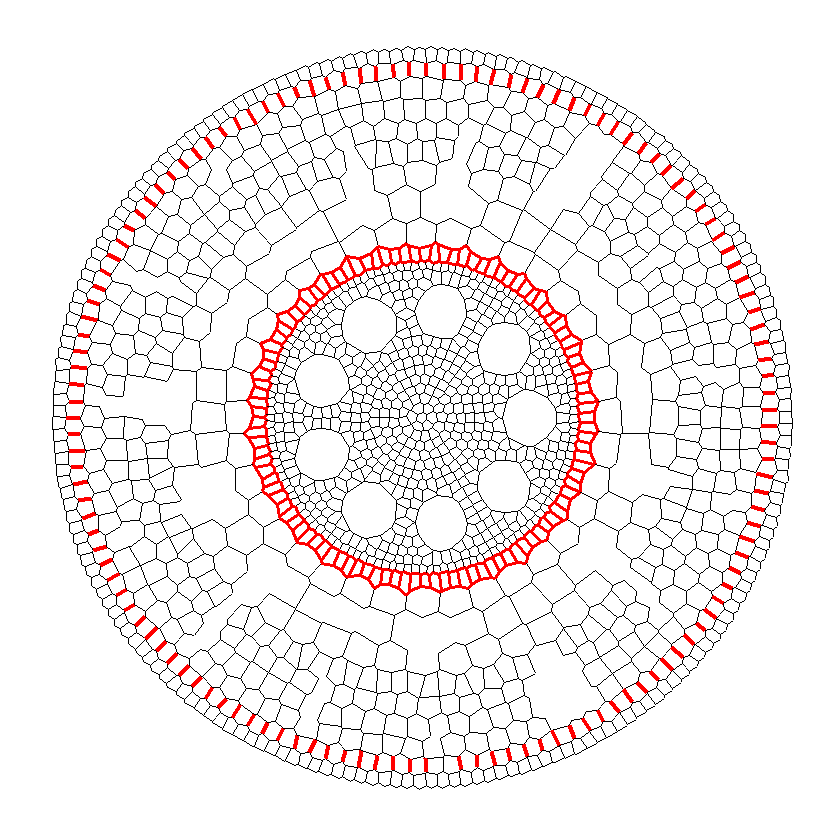

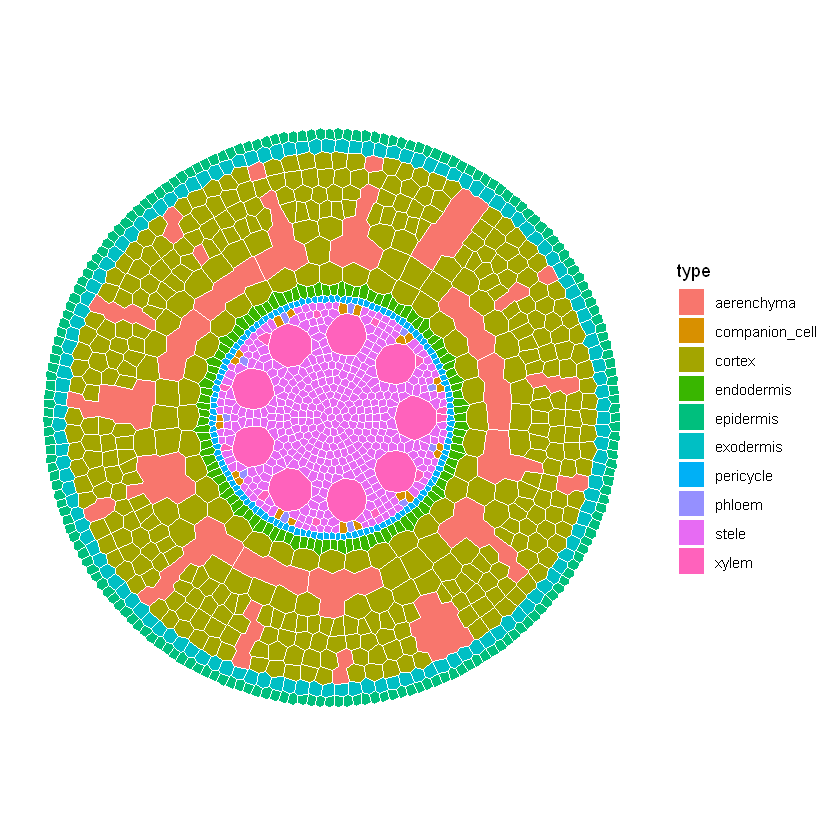

In [4]:
# To visualize the anatomy and the scenario that are going to be tested.
# you can use the plot_anatomy function.
plot_anatomy(sim, col = "segment", apo_bar = 1)
plot_anatomy(sim, col = "segment", apo_bar = 2)
plot_anatomy(sim, col = "segment", apo_bar = 3)

# To visualize cell type:
plot_anatomy(sim) # default type

In [5]:
# write geometry
write_anatomy_xml(sim, "./MECHA/cellsetdata/current_root.xml")
# give explicit location of root lacuna in geometry
aer_in_geom_xml(sim, path = "./MECHA/Projects/granar/in/Maize_Geometry.xml")

Warning message:
"Unknown or uninitialised column: `x3`."
Note: Using an external vector in selections is ambiguous.
i Use `all_of(sorted_name)` instead of `sorted_name` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



   id_group                 type
1         1            exodermis
2         2            epidermis
3         3           endodermis
4         3         passage_cell
5         4               cortex
6         5                stele
7        13                xylem
8        16            pericycle
9        12       companion_cell
10       11               phloem
11        4 inter_cellular_space
12        4           aerenchyma
13        3              cambium


[1] TRUE

[1] TRUE

In [6]:
# hydraulic conductivity of standard walls
kw = 2.4E-4 # [cm^2/hPa/d] Zhu and Steudle (1991)

# Cell membrane permeability, with separate contribution of the biphospholipid layer (km) and AQP (kAQP)
km = 3.0E-5 # [cm/hPa/d]  after removal of kAQP and kpl from Elhert et al. (2009) and Bret-Hart and Silk (1994)
kAQP = 4.3E-4 # [cm/hPa/d] uniformly distributed on each cell layer

# Individual plasmodesma conductance
kpl = 5.3E-12 #  [cm^3/hPa/d/plasmodesmata] Geometrical average from Bret-Hart and Silk (1994)

# change cell hydraulic properties
microhydro(path = "MECHA/Projects/granar/in/Maize_Hydraulics.xml",
           kw, km, kAQP, kpl)

[1] "the cell hydraulic parameters have been change"


## MECHA:
Upon this generated cross-section and the cell hydraulic properties defined in Hydraulic.xml
MECHA estimates the radial hydraulic conductivities (for three scenarios: 1 = an endodermal casparian strip, 2 = a fully suberized endodermis, 3 = fully suberized endodermis and a casparian strip on the exodermis.

Change kernel to Python to launch the following script. Once the kernel is changed, all variables stored in R are gone.

In [43]:
import ipywidgets as widgets

In [61]:
print("Kw: hydraulic conductivity of standard walls [cm^2/hPa/d]")
kwa = widgets.FloatText(min = 5E-6, max = 5E-4, step = 5E-6, value = 2.4E-4)
kwb = widgets.FloatSlider(min = 5E-6, max = 5E-4, step = 5E-6, value = 2.4E-4, readout_format = '.5f')
display(kwa,kwb)
kwlink = widgets.link((kwa, 'value'), (kwb, 'value'))


Kw: hydraulic conductivity of standard walls [cm^2/hPa/d]


FloatText(value=0.00024, step=5e-06)

FloatSlider(value=0.00024, max=0.0005, min=5e-06, readout_format='.5f', step=5e-06)

In [59]:
kma = widgets.FloatText(min = 5E-6, max = 5E-4, step = 5E-6, value = 3E-5)
kmb = widgets.FloatSlider(min = 5E-6, max = 5E-4, step = 5E-6, value = 3E-5, readout_format = '.5f')
display(kma, kmb)
mylink = widgets.link((kma, 'value'), (kmb, 'value'))

FloatText(value=3e-05, step=5e-06)

FloatSlider(value=3e-05, max=0.0005, min=5e-06, readout_format='.5f', step=5e-06)

In [ ]:
kw = kwa.value
km = kma.value

In [1]:
from mecha_function import *

mecha()

Importing geometrical data
Import Geometrical data
Creating network nodes
Creating network connections
Importing hydraulic data
Maturity #0 with apoplastic barrier type #1
Radial conductivity: 0.00010599725530909366 cm/hPa/d
Scenario #1
Uptake rate per unit root length: soil  0.24666903178543265 cm^2/d, xylem  -0.2466690317864261 cm^2/d, phloem  0.0 cm^2/d, elongation  0.0 cm^2/d
Mass balance error: -9.93432766605018e-13 cm^2/d
Maturity #1 with apoplastic barrier type #2
Radial conductivity: 7.849246868479168e-06 cm/hPa/d
Scenario #1
Uptake rate per unit root length: soil  0.018266191135295266 cm^2/d, xylem  -0.018266191136597942 cm^2/d, phloem  0.0 cm^2/d, elongation  0.0 cm^2/d
Mass balance error: -1.302677041757627e-12 cm^2/d
Maturity #2 with apoplastic barrier type #4
Radial conductivity: 7.74548065673231e-06 cm/hPa/d
Scenario #1
Uptake rate per unit root length: soil  0.018024714024317254 cm^2/d, xylem  -0.018024714025842513 cm^2/d, phloem  0.0 cm^2/d, elongation  0.0 cm^2/d
Mass 

C:\Users\couvreurv\Documents\GitHub\GranarMecha\mecha_function.py:4322: RuntimeWarning: invalid value encountered in double_scalars
  myfile.write(str(PsiWallLayer[j][iMaturity][i]/NWallLayer[j][iMaturity][i])+" \n")


This last script cell might take a 2 to 5 min to run and gives the estimated hydraulic properties.

To visualize the results change again the kernel to R. Sorry about that, my python skills are not that good.


In [ ]:
# Loading again the R library
library(tidyverse)
library(plyr)
library(deldir)
library(sp)
library(xml2)
library(viridis)

source("./GRANAR/R/granar.R")

Upload MECHA output 

In [ ]:
Flux1 <- ApoSymp("MECHA/Projects/granar/out/Root/Project_Test/baseline/Macro_prop_1,0.txt")
Flux2 <- ApoSymp("MECHA/Projects/granar/out/Root/Project_Test/baseline/Macro_prop_2,1.txt")
Flux3 <- ApoSymp("MECHA/Projects/granar/out/Root/Project_Test/baseline/Macro_prop_4,2.txt")

Plot the results to see the symplastic water fluxes (in blue) and the apoplastic fluxes (in light brown). The sum of the two water fluxes equals to the total water fluxes. Once the water is in the stele, the water is being lifted by the xylem poles.

In [ ]:
plot_water_flux(Flux1, apobar = 1)
plot_water_flux(Flux2, apobar = 2)
plot_water_flux(Flux3, apobar = 3)